In [1]:
#Create a variable jobsOpen that tells how many jobs are currently being worked on on your ship
import pandas as pd
dat = pd.read_csv(r'C:\Users\carswje\OneDrive - HII\Documents\GitHub\Fleet-Sustainment-HVAC-Project\RawData\cvn-hvac-jobs-data.csv')

C:\Users\carswje\AppData\Local\Temp\ipykernel_12108\1456687143.py:3: DtypeWarning: Columns (3,4,20) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv(r'C:\Users\carswje\OneDrive - HII\Documents\GitHub\Fleet-Sustainment-HVAC-Project\RawData\cvn-hvac-jobs-data.csv')


In [ ]:
dat = dat.dropna(subset = ['date_closing'])
dat['date_maintenance_action'] = pd.to_datetime(dat['date_maintenance_action'])
dat['date_closing'] = pd.to_datetime(dat['date_closing'])

cvn68 = dat[dat['ship'] == 'CVN68']
cvn68 = cvn68.sort_values('date_maintenance_action').reset_index(drop =True)

In [13]:
cvn68['jobsOpen'] = 0 

for i in range(len(cvn68) - 1): #for each job
    for j in range(i): #for all j less than i
        if cvn68.loc[j, 'date_closing'] >  cvn68.loc[i, 'date_maintenance_action']:
            cvn68.loc[i, 'jobsOpen'] += 1

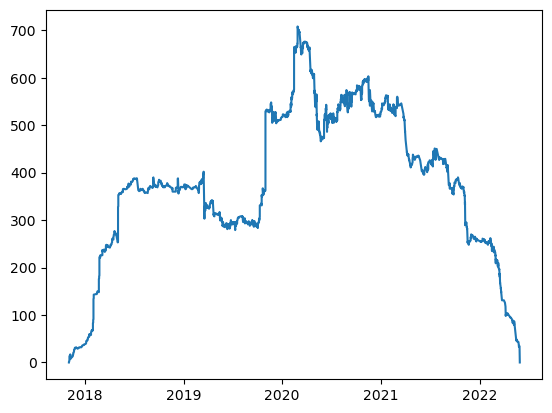

In [19]:
import matplotlib.pyplot as plt

plt.plot(cvn68['date_maintenance_action'],cvn68['jobsOpen'])

In [ ]:
cvn68['date_maintenance_action'].value_counts() #Need to consider ties. The loop looks at jobs by increasing date_maintenance_action. Depending on how ties are broken, Job A could have a different # of jobs open than job B because one was iterated through before the other

date_maintenance_action
2019-10-31    167
2020-02-14     89
2018-05-03     74
2018-02-01     44
2018-02-23     40
             ... 
2020-08-14      1
2019-03-15      1
2019-03-23      1
2021-02-25      1
2022-05-30      1
Name: count, Length: 979, dtype: int64